In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="Series.__getitem__ treating keys as positions is deprecated.")
warnings.filterwarnings("ignore", message="To access a value by position, use `ser.iloc[pos]`")

In [61]:
datos = pd.read_csv('/home/david/Documentos/Archivos/Drive/AccidentesAviones.csv')

copia = datos.copy()

In [62]:
copia.sample(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
683,683,"June 30, 1943",?,"Khartoum, Sudan",British Overseas Airways,?,?,Lockheed Hudson VI,FK-618,?,16,?,?,16,?,?,0,?


In [63]:
copia.shape

(5008, 18)

In [64]:
copia.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

### Breve descripcion del contenido de las columnas.


1.   Unnamed: 0: Un índice o identificador único para el registro en el conjunto de datos .
2.   fecha: La fecha del accidente
3.   HORA declarada: La hora declarada del accidente.
4.   Ruta: La ubicación o ruta donde ocurrió el accidente.
5.   OperadOR: La aerolínea u operador de la aeronave.
6.   flight_no: El número de vuelo asignado por la aerolínea.
7.   route: La ruta completa o parcial del vuelo antes del accidente.
8.   ac_type: El tipo de aeronave involucrada en el accidente.
9.   registration: El registro o matrícula de la aeronave.
10.  cn_ln: El número de construcción o línea de la aeronave.
11.  all_aboard: El número total de personas a bordo, incluyendo pasajeros y tripulación.
12.  PASAJEROS A BORDO: El número de pasajeros a bordo.
13.  crew_aboard: El número de miembros de la tripulación a bordo.
14.  cantidad de fallecidos: El número total de personas fallecidas en el accidente.
15.  passenger_fatalities: El número de pasajeros fallecidos en el accidente.
16.  crew_fatalities: El número de miembros de la tripulación fallecidos en el accidente.
17.  ground: La cantidad de víctimas en tierra, si las hubiera.
18.  summary: Un resumen o descripción breve del accidente.



In [65]:
copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [66]:
nuevos_nombres = {
    'Unnamed: 0': 'ID_Accidente',
    'fecha': 'Fecha',
    'HORA declarada': 'Hora',
    'Ruta': 'Ubicación',
    'OperadOR': 'Operador',
    'flight_no': 'Número_Vuelo',
    'route': 'Ruta',
    'ac_type': 'Tipo_Aeronave',
    'registration': 'Matricula',
    'cn_ln': 'Número_Construcción',
    'all_aboard': 'Total_Pasajeros',
    'PASAJEROS A BORDO': 'Pasajeros_A Bordo',
    'crew_aboard': 'Tripulación_A Bordo',
    'cantidad de fallecidos': 'Total_Fallecidos',
    'passenger_fatalities': 'Fallecidos_Pasajeros',
    'crew_fatalities': 'Fallecidos_Tripulación',
    'ground': 'Fallecidos_En_Tierra',
    'summary': 'Resumen'
}

copia.rename(columns=nuevos_nombres, inplace=True)


Original | Cambiado
---|---
Unnamed: 0 | ID_Accidente
fecha | Fecha
HORA declarada | Hora
Ruta | Ubicación
OperadOR | Operador
flight_no | Número_Vuelo
route | Ruta
ac_type | Tipo_Aeronave
registration | Matricula
cn_ln | Número_Construcción
all_aboard | Total_Pasajeros
PASAJEROS A BORDO | Pasajeros_A Bordo
crew_aboard | Tripulación_A Bordo
cantidad de fallecidos | Total_Fallecidos
passenger_fatalities | Fallecidos_Pasajeros
crew_fatalities | Fallecidos_Tripulación
ground | Fallecidos_En_Tierra
summary | Resumen



In [67]:
copia.sample(1)

,ID_Accidente,Fecha,Hora,Ubicación,Operador,Número_Vuelo,Ruta,Tipo_Aeronave,Matricula,Número_Construcción,Total_Pasajeros,Pasajeros_A Bordo,Tripulación_A Bordo,Total_Fallecidos,Fallecidos_Pasajeros,Fallecidos_Tripulación,Fallecidos_En_Tierra,Resumen
2990,2990,"October 08, 1978",09:25,"Kenai, Alaska",Era Helicopter - Air Taxi,?,"Kenai, AK - Return",Bell 205-1,N2215W,?,7,6,1,2,2,0,0,The tail rotor pitch control system failed sho...


In [68]:
copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID_Accidente            5008 non-null   int64 
 1   Fecha                   5008 non-null   object
 2   Hora                    5008 non-null   object
 3   Ubicación               5008 non-null   object
 4   Operador                5008 non-null   object
 5   Número_Vuelo            5008 non-null   object
 6   Ruta                    5007 non-null   object
 7   Tipo_Aeronave           5008 non-null   object
 8   Matricula               5008 non-null   object
 9   Número_Construcción     5008 non-null   object
 10  Total_Pasajeros         5008 non-null   object
 11  Pasajeros_A Bordo       5008 non-null   object
 12  Tripulación_A Bordo     5008 non-null   object
 13  Total_Fallecidos        5008 non-null   object
 14  Fallecidos_Pasajeros    5008 non-null   object
 15  Fall

Examinar la cantidad de accidentes aéreos a lo largo del tiempo y detectar tendencias o patrones.

In [69]:
# Convierte la columna 'Fecha' al tipo de datos de fecha y hora
copia['Fecha'] = pd.to_datetime(copia['Fecha'])

In [70]:
# Crea una nueva columna 'Año' para extraer el año de la fecha
copia['Año'] = copia['Fecha'].dt.year

In [71]:
# Cuenta la cantidad de accidentes por año
accidentes_por_año = copia['Año'].value_counts().sort_index()
print(accidentes_por_año)

Año
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2017    15
2018    19
2019    13
2020     8
2021     7
Name: count, Length: 111, dtype: int64


Creamos la columna pais con la libreria geopy, para realizar análisis geográficos, como identificar los países con mayor número de accidentes aéreos o los países con mayor tasa de accidentes aéreos.

In [72]:
copia["Ubicación"].sample(5)

4044      Belgrade, Yugosalvia
1743    Rio de Janerio, Brazil
661      Near Tashkent, Russia
3830             Zwingle, Iowa
1498    Off Skellings, Ireland
Name: Ubicación, dtype: object

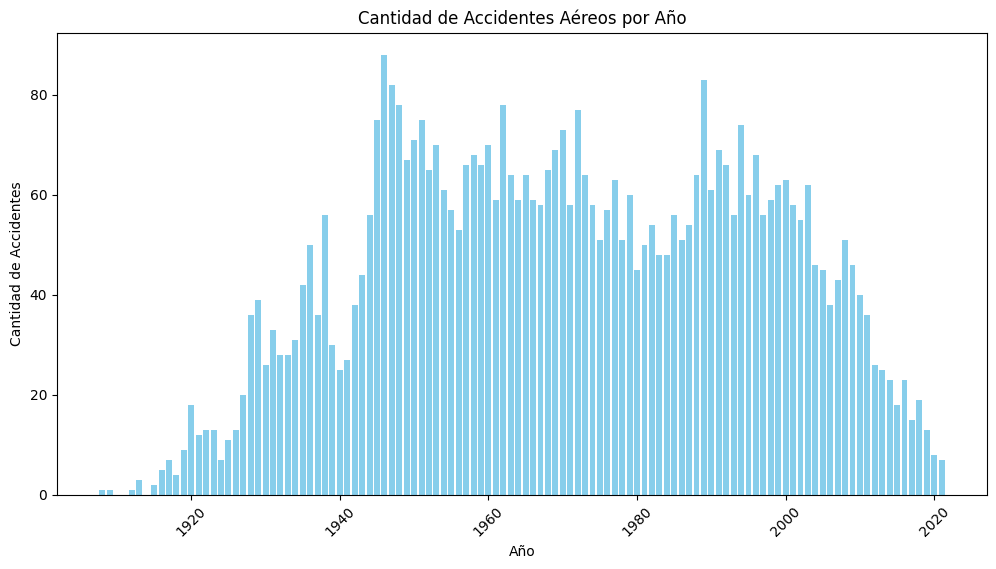

In [73]:
# @title Cantidad de accidentes por año
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras
plt.bar(accidentes_por_año.index, accidentes_por_año.values, color='skyblue')

# Configura etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes Aéreos por Año')

# Rotación de los años en el eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()



In [74]:
# Identificar las aerolíneas más comunes
aerolineas_comunes = copia['Operador'].value_counts().head(10)
print("Aerolíneas más comunes:")
print(aerolineas_comunes)


Aerolíneas más comunes:
Operador
Aeroflot                               253
Military - U.S. Air Force              141
Air France                              74
Deutsche Lufthansa                      63
United Air Lines                        44
China National Aviation Corporation     43
Military - U.S. Army Air Forces         43
Pan American World Airways              41
American Airlines                       37
US Aerial Mail Service                  35
Name: count, dtype: int64


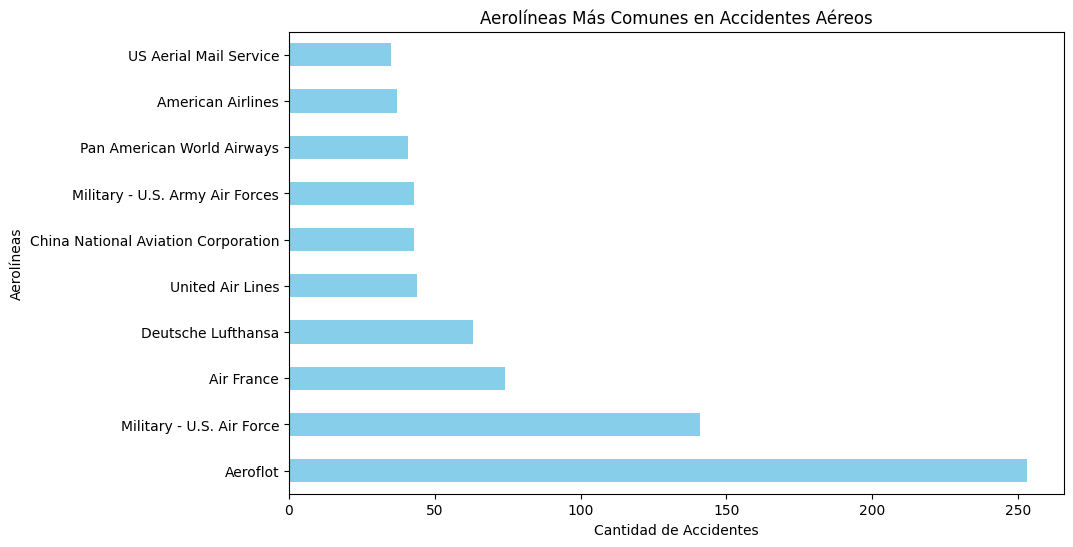

In [75]:
# @title Gráfico de Barras de Aerolíneas Más Comunes en Accidentes Aéreos
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras horizontal
aerolineas_comunes.plot(kind='barh', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Aerolíneas')
plt.title('Aerolíneas Más Comunes en Accidentes Aéreos')

# Muestra el gráfico
plt.show()



In [76]:
# Identificar los tipos de aeronaves más comunes
tipos_aeronaves_comunes = copia['Tipo_Aeronave'].value_counts().head(10)
print("\nTipos de aeronaves más comunes:")
print(tipos_aeronaves_comunes)



Tipos de aeronaves más comunes:
Tipo_Aeronave
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
De Havilland DH-4                            27
Douglas C-47B                                27
Name: count, dtype: int64


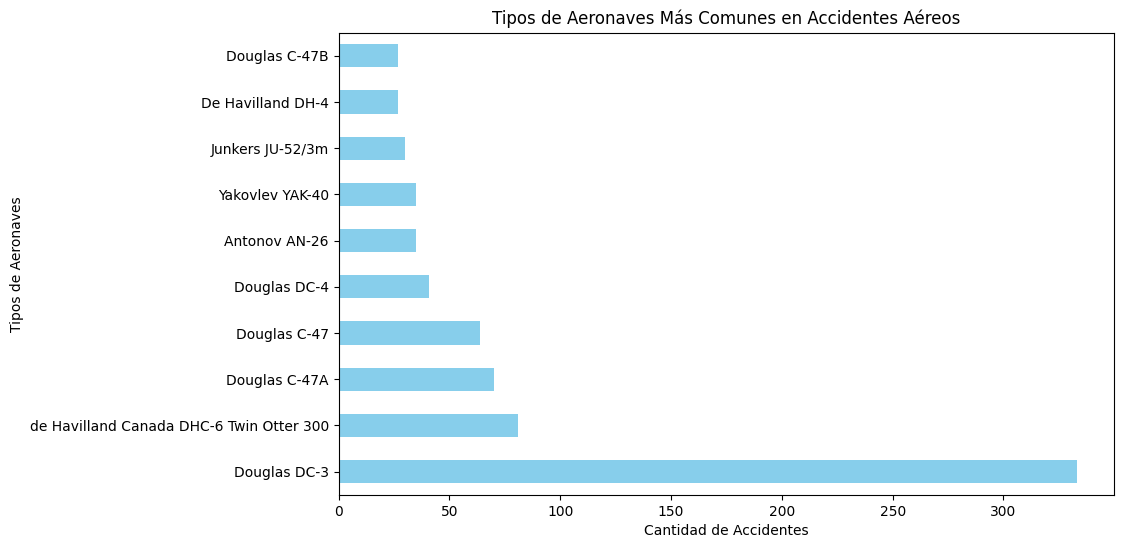

In [77]:
# @title Gráfico de Barras de Tipos de Aeronaves Más Comunes en Accidentes Aéreos
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras horizontal
tipos_aeronaves_comunes.plot(kind='barh', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipos de Aeronaves')
plt.title('Tipos de Aeronaves Más Comunes en Accidentes Aéreos')

# Muestra el gráfico
plt.show()



In [78]:
# Identificar las rutas más comunes
rutas_comunes = copia['Ruta'].value_counts().head(10)
print("\nRutas más comunes:")
print(rutas_comunes)



Rutas más comunes:
Ruta
?                             762
Training                       96
Sightseeing                    31
Test flight                    23
Sao Paulo - Rio de Janeiro      7
Test                            6
Rio de Janeiro - Sao Paulo      5
Huambo - Luanda                 4
Villavicencio - Mitu            4
Barranquilla - Bogota           4
Name: count, dtype: int64


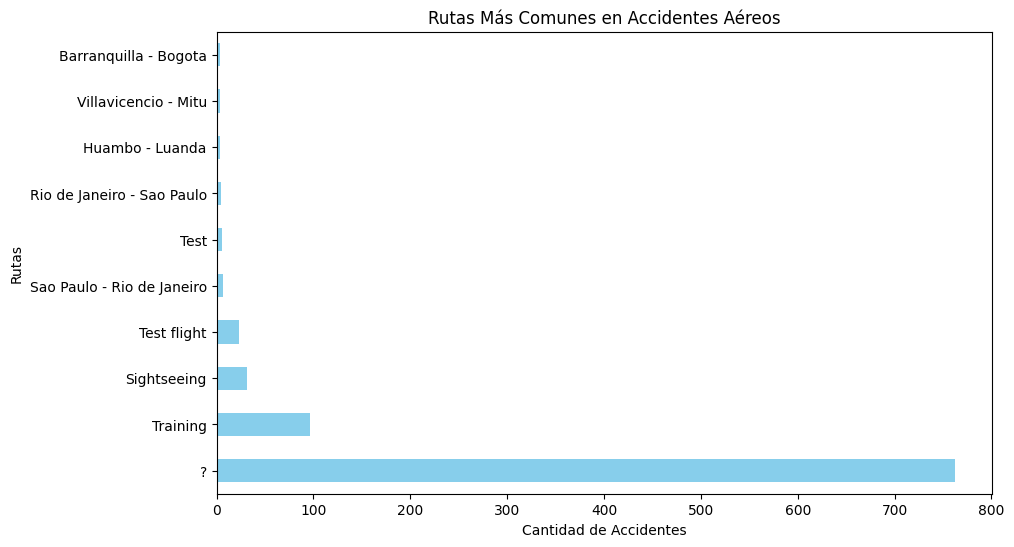

In [79]:
# @title Gráfico de Barras de Rutas Más Comunes en Accidentes Aéreos
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras horizontal
rutas_comunes.plot(kind='barh', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Rutas')
plt.title('Rutas Más Comunes en Accidentes Aéreos')

# Muestra el gráfico
plt.show()



In [80]:
# Cambiar las columnas a tipos numéricos, ya que plt.bar espera valores numéricos.
# Este código primero crea una lista de las columnas que deseas convertir a tipo numérico
columnas_numericas = ['Total_Pasajeros', 'Pasajeros_A Bordo', 'Tripulación_A Bordo', 'Total_Fallecidos', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulación', 'Fallecidos_En_Tierra']

# Intenta convertir las columnas a tipo numérico
for columna in columnas_numericas:
    copia[columna] = pd.to_numeric(copia[columna], errors='coerce')


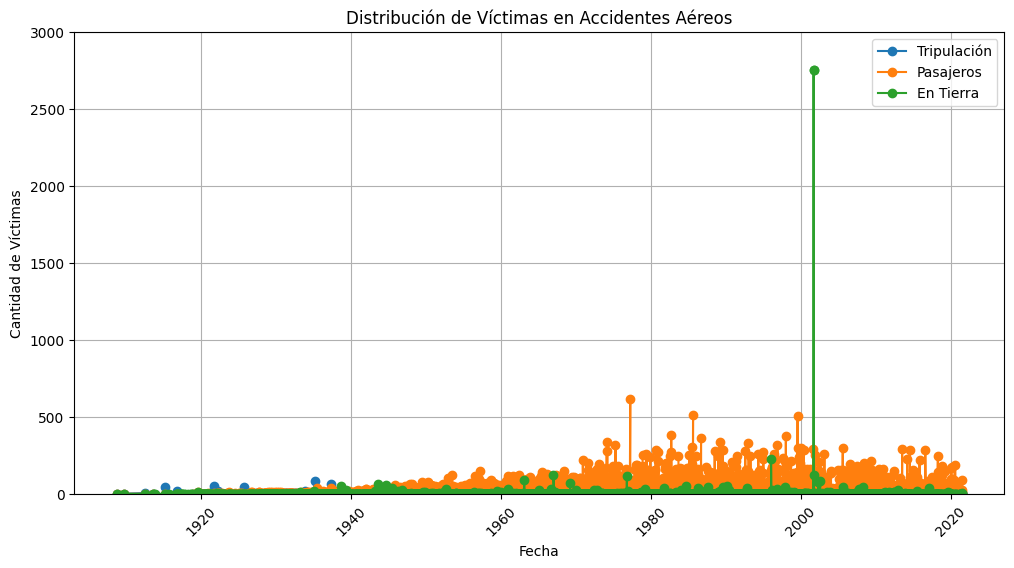

In [81]:
# @title Distribución de Víctimas en Accidentes Aéreos
# Configura el tamaño de la figura

plt.figure(figsize=(12, 6))

# Crea un gráfico de líneas para cada tipo de víctima
plt.plot(copia['Fecha'], copia['Tripulación_A Bordo'], label='Tripulación', marker='o')
plt.plot(copia['Fecha'], copia['Pasajeros_A Bordo'], label='Pasajeros', marker='o')
plt.plot(copia['Fecha'], copia['Fallecidos_En_Tierra'], label='En Tierra', marker='o')

# Configura etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Víctimas')
plt.title('Distribución de Víctimas en Accidentes Aéreos')
plt.xticks(rotation=45)

# Limita el valor máximo del eje y a 300
plt.ylim(0, 3000)

# Añade una leyenda
plt.legend()

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.show()




Buscamos valores faltantes, duplicados y outliers en los datos:


In [82]:
# Buscar valores faltantes
valores_faltantes = copia.isnull().sum()
print("Valores Faltantes:\n", valores_faltantes)

Valores Faltantes:
 ID_Accidente                0
Fecha                       0
Hora                        0
Ubicación                   0
Operador                    0
Número_Vuelo                0
Ruta                        1
Tipo_Aeronave               0
Matricula                   0
Número_Construcción         0
Total_Pasajeros            17
Pasajeros_A Bordo         221
Tripulación_A Bordo       219
Total_Fallecidos            8
Fallecidos_Pasajeros      235
Fallecidos_Tripulación    235
Fallecidos_En_Tierra       44
Resumen                     0
Año                         0
dtype: int64


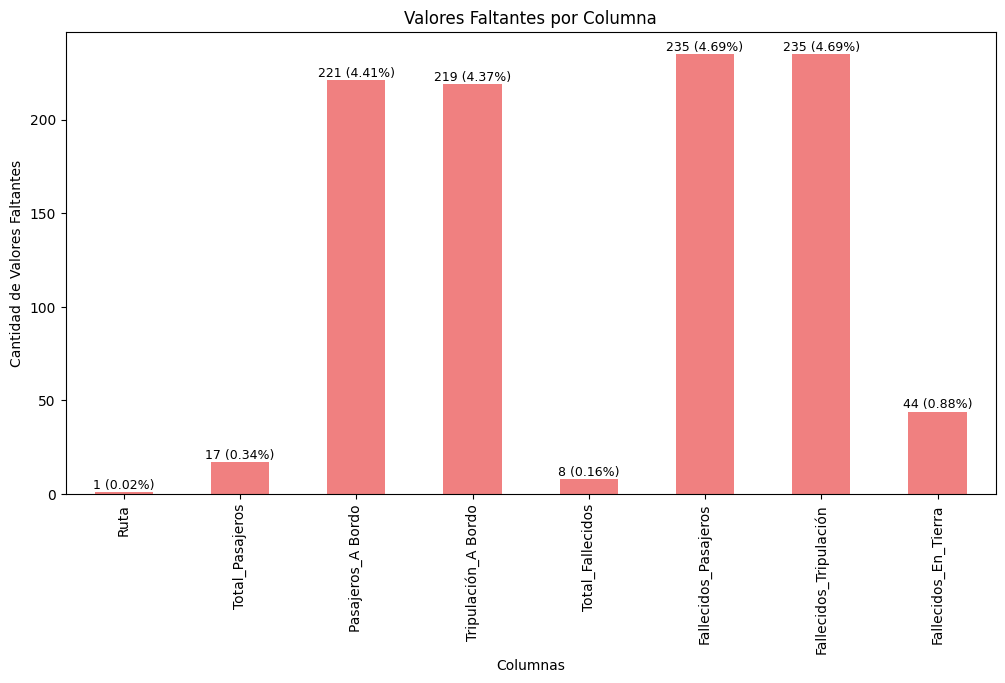

In [83]:
# @title Valores faltantes
valores_faltantes = copia.isnull().sum()

# Calcula el porcentaje de valores faltantes
porcentaje_faltantes = (valores_faltantes / len(copia)) * 100

# Filtra las columnas con porcentaje mayor que 0%
valores_faltantes = valores_faltantes[porcentaje_faltantes > 0]
porcentaje_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras
valores_faltantes.plot(kind='bar', color='lightcoral')

# Configura etiquetas y título
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.title('Valores Faltantes por Columna')

# Agrega un cuadro con el porcentaje de valores faltantes
for i, valor in enumerate(valores_faltantes):
    # Ajusta la posición vertical del texto del porcentaje
    ypos = valor + 10 if porcentaje_faltantes[i] >= 10 else valor + 2
    plt.text(i, ypos, f'{valor} ({porcentaje_faltantes[i]:.2f}%)', ha='center', fontsize=9)

# Muestra el gráfico
plt.show()

In [84]:
# Buscar registros duplicados
duplicados = copia[copia.duplicated()]
print("\nRegistros Duplicados:\n", duplicados)


Registros Duplicados:
 Empty DataFrame
Columns: [ID_Accidente, Fecha, Hora, Ubicación, Operador, Número_Vuelo, Ruta, Tipo_Aeronave, Matricula, Número_Construcción, Total_Pasajeros, Pasajeros_A Bordo, Tripulación_A Bordo, Total_Fallecidos, Fallecidos_Pasajeros, Fallecidos_Tripulación, Fallecidos_En_Tierra, Resumen, Año]
Index: []


Se encuentra la misma matrícula (identificación única de una aeronave) dos veces en el DataFrame de accidentes, eso podría indicar que la misma aeronave ha estado involucrada en dos accidentes diferentes. Sin embargo, es importante tener en cuenta que la matrícula de una aeronave no siempre es única y puede haber casos en los que varias aeronaves compartan la misma matrícula, especialmente si se trata de aeronaves de la misma compañía o flota.

In [85]:
conteoValores = copia['Matricula'].value_counts()
conteoValores = conteoValores[conteoValores>1]
conteoValores

Matricula
?             272
49              3
SU-AFK          2
2               2
19              2
CCCP-45012      2
101             2
G-ADUZ          2
VH-ABB          2
OK-MCT          2
I-BAUS          2
N91303          2
CCCP-09303      2
SP-AYD          2
NC14272         2
CCCP-46724      2
ZRS-4           2
F-FHMY          2
YR-PAF          2
RF-76801        2
XA-GOT          2
TC-72           2
F-AHEQ          2
N37741          2
223             2
F-AIUJ          2
44-77577        2
77              2
32              2
82              2
53              2
CF-TCL          2
12406           2
F-BBDM          2
204             2
G-AEUH          2
Name: count, dtype: int64

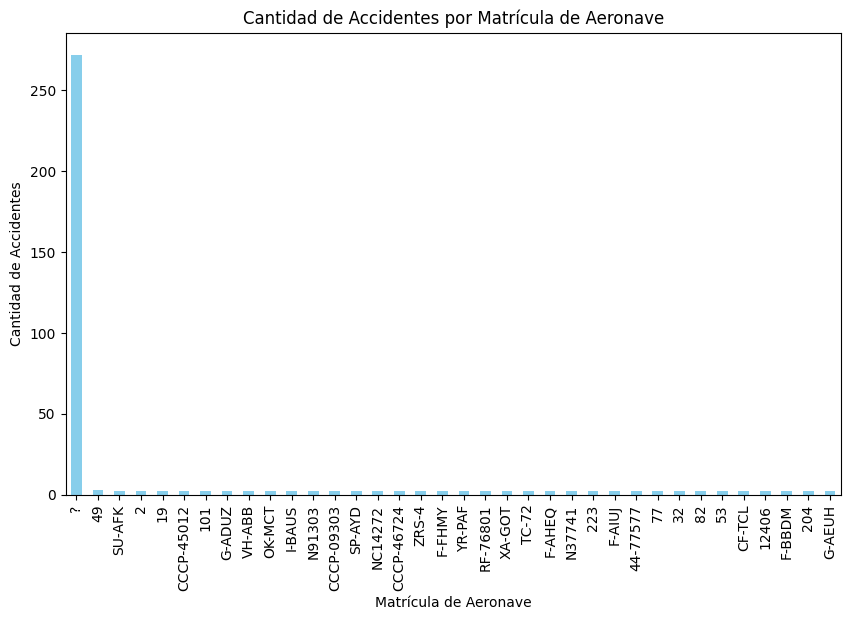

In [86]:
# @title Matrículas duplicadas
# Filtra las matrículas que aparecen más de una vez
conteo_valores = copia['Matricula'].value_counts()
conteo_valores = conteo_valores[conteo_valores > 1]

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras
conteo_valores.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Matrícula de Aeronave')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Matrícula de Aeronave')

# Muestra el gráfico
plt.show()


In [87]:
# @title Buscar outliers en columnas numéricas
columnas_numericas = ['Total_Pasajeros', 'Pasajeros_A Bordo', 'Tripulación_A Bordo', 'Total_Fallecidos', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulación', 'Fallecidos_En_Tierra']
for columna in columnas_numericas:
    # Calcular el rango intercuartil (IQR)
    Q1 = copia[columna].quantile(0.25)
    Q3 = copia[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar outliers
    outliers = copia[(copia[columna] < limite_inferior) | (copia[columna] > limite_superior)]

    # Imprimir resumen
    print(f"\nOutliers en {columna}: {len(outliers)} registros.")



Outliers en Total_Pasajeros: 500 registros.

Outliers en Pasajeros_A Bordo: 496 registros.

Outliers en Tripulación_A Bordo: 151 registros.

Outliers en Total_Fallecidos: 454 registros.

Outliers en Fallecidos_Pasajeros: 444 registros.

Outliers en Fallecidos_Tripulación: 232 registros.

Outliers en Fallecidos_En_Tierra: 248 registros.


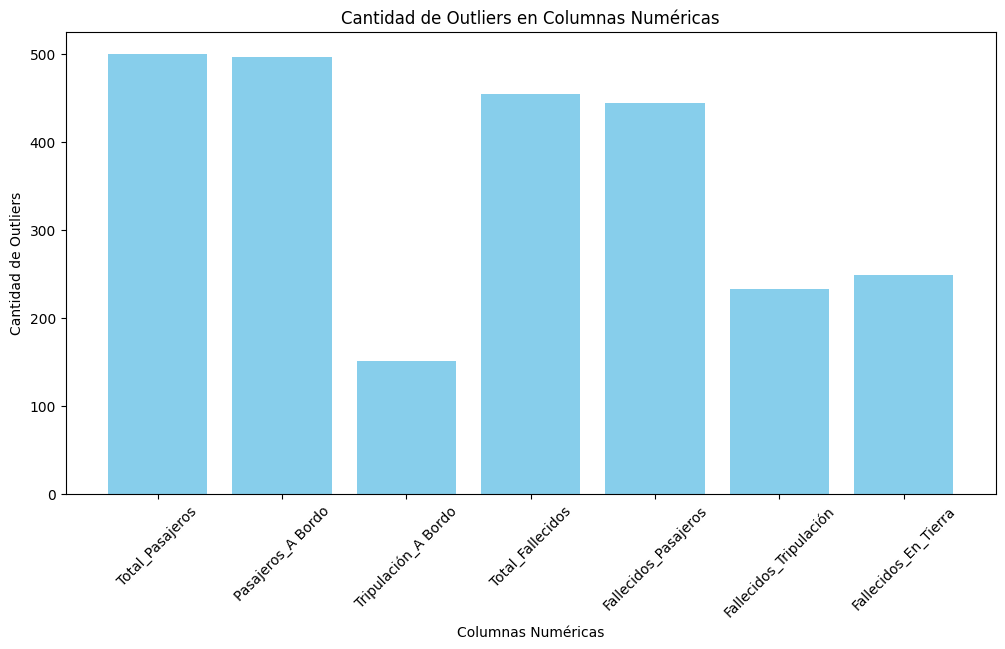

In [88]:
# @title Cantidad de outliers en cada una de las columnas numéricas
columnas_numericas = ['Total_Pasajeros', 'Pasajeros_A Bordo', 'Tripulación_A Bordo', 'Total_Fallecidos', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulación', 'Fallecidos_En_Tierra']

# Lista para almacenar la cantidad de outliers en cada columna
cantidad_outliers = []

# Calcular la cantidad de outliers en cada columna
for columna in columnas_numericas:
    Q1 = copia[columna].quantile(0.25)
    Q3 = copia[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = copia[(copia[columna] < limite_inferior) | (copia[columna] > limite_superior)]
    cantidad_outliers.append(len(outliers))

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras
plt.bar(columnas_numericas, cantidad_outliers, color='skyblue')

# Configura etiquetas y título
plt.xlabel('Columnas Numéricas')
plt.ylabel('Cantidad de Outliers')
plt.title('Cantidad de Outliers en Columnas Numéricas')

# Rotación de las etiquetas para una mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()







In [89]:
# Definir límites para valores extremos (pueden ajustarse según el contexto)
limite_superior_total_pasajeros = 1000

# Filtrar valores extremos
valores_extremos_total_pasajeros = copia[copia['Total_Pasajeros'] > limite_superior_total_pasajeros]

# Imprimir los valores extremos para su revisión
print("Valores extremos en 'Total_Pasajeros':")
print(valores_extremos_total_pasajeros)


Valores extremos en 'Total_Pasajeros':
Empty DataFrame
Columns: [ID_Accidente, Fecha, Hora, Ubicación, Operador, Número_Vuelo, Ruta, Tipo_Aeronave, Matricula, Número_Construcción, Total_Pasajeros, Pasajeros_A Bordo, Tripulación_A Bordo, Total_Fallecidos, Fallecidos_Pasajeros, Fallecidos_Tripulación, Fallecidos_En_Tierra, Resumen, Año]
Index: []


Generamos un conjunto de histogramas para cada columna con valores atípicos, lo que permitirá analizar en detalle la distribución de los datos y verificar si los valores atípicos parecen ser errores de entrada o casos legítimos.

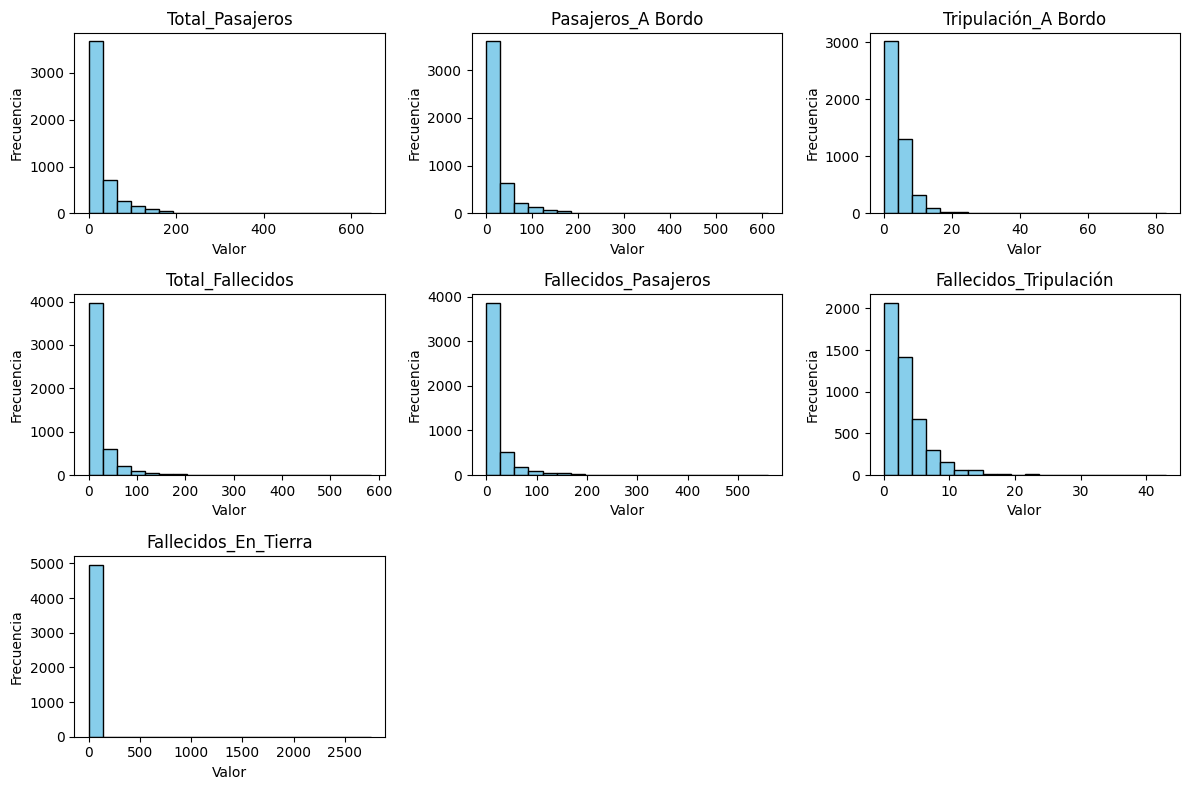

In [90]:
#@title Columnas con valores atípicos
columnas_numericas = ['Total_Pasajeros', 'Pasajeros_A Bordo', 'Tripulación_A Bordo',
                      'Total_Fallecidos', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulación',
                      'Fallecidos_En_Tierra']

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Plotea un histograma para cada columna con valores atípicos
for columna in columnas_numericas:
    plt.subplot(3, 3, columnas_numericas.index(columna) + 1)
    plt.hist(copia[columna], bins=20, color='skyblue', edgecolor='black')
    plt.title(columna)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra los histogramas
plt.show()

Después de analizar los histogramas y los valores atípicos se concluyo que representan casos legítimos en lugar de errores en los datos, se puede proceder con confianza en el análisis.

In [91]:
# Guardar el DataFrame en un nuevo archivo CSV
copia.to_csv('accidentes_aereos_limpio.csv', index=False, sep=';')


Hacemos la coneccion con SQlite3  

In [92]:
import sqlite3 


# Crear una conexión a la base de datos SQLite
conexion = sqlite3.connect('accidentes_aereos.db')



In [93]:
crear_tabla = """ CREATE TABLE accidentes_aereos (
    'ID_Accidente': 'int',
    'Fecha': 'date',
    'Hora': 'text',
    'Ubicación': 'text',
    'Operador': 'text',
    'Número_Vuelo': 'text',
    'Ruta': 'text',
    'Tipo_Aeronave': 'text',
    'Matrícula': 'text',
    'Número_Construcción': 'text',
    'Total_Pasajeros': 'real',
    'Pasajeros_A Bordo': 'real',
    'Tripulación_A Bordo': 'real',
    'Total_Fallecidos': 'real',
    'Fallecidos_Pasajeros': 'real',
    'Fallecidos_Tripulación': 'real',
    'Fallecidos_En_Tierra': 'real',
    'Resumen': 'text',
    'Año': 'int'
 ) """

In [94]:
# Crear una conexión a la base de datos SQLite
conexion = sqlite3.connect('accidentes_aereos.db')

# Crear un cursor
cursor = conexion.cursor()

# Insertar los datos del dataframe en la tabla
for fila in .itertuples():
  cursor.execute('INSERT INTO accidentes_aereos (ID_Accidente, Fecha, Hora, Ubicación, Operador, Número_Vuelo, Ruta, Tipo_Aeronave, Matrícula, Número_Construcción, Total_Pasajeros, Pasajeros_A_Bordo, Tripulación_A_Bordo, Total_Fallecidos, Fallecidos_Pasajeros, Fallecidos_Tripulación, Fallecidos_En_Tierra, Resumen, Año) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)', fila)

# Cerrar el cursor
cursor.close()

# Cerrar la conexión a la base de datos SQLite
conexion.close()

NameError: name 'df' is not defined